C:\Users\marti\AppData\Local\Temp\ipykernel_40324\3293812319.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=df2, x="gen_num", y="fitness", ci="sd")


NameError: name 'morphologie' is not defined

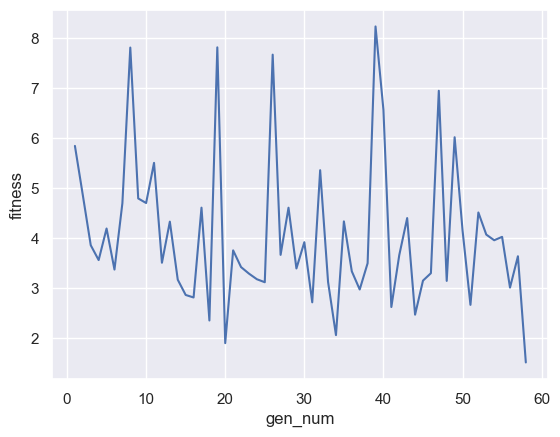

In [4]:
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt




df2 = pd.read_csv(f'data.csv')


  # concat dataframes
#df2= copy.deepcopy(df_total)
#df2= df
#df2['fitness'] = df2['fitness']*100/10  # transform fitness to cm/s
#df2 = df2[df2["fitness"] > 0.]
#df2
sns.set_theme(style="darkgrid")
df2 = df2.groupby('gen_num').max()
# Plot the responses for different events and regions
ax = sns.lineplot(data=df2, x="gen_num", y="fitness", ci="sd")
ax.set(xlabel='Number of evalutions',
   ylabel='fitness (ω/s)',
   title= (f'Mean fitness {morphologie}'))
#ax.set(ylim=(0, 32))
fig = ax.get_figure()
#fig.savefig(f"mean_fitness_rotation_{morphologie}.png")
return plt.show()

In [7]:
"""
Plot average, min, and max fitness over generations, using the results of the evolutionary optimizer.
Assumes fitness is a float and database is files.
"""

import argparse

import matplotlib.pyplot as plt
import pandas
from sqlalchemy.future import select
from revolve2.core.database import open_database_sqlite
from revolve2.core.optimization.ea.openai_es import DbOpenaiESOptimizerIndividual

def plot(database: str, process_id: int) -> None:
    # open the database
    try:
        db = open_database_sqlite(database)
    except:
        print("no!")
        return
    # read the optimizer data into a pandas dataframe
    df = pandas.read_sql(
        select(DbOpenaiESOptimizerIndividual).filter(
            DbOpenaiESOptimizerIndividual.process_id == process_id
        ),
        db,
    )
    # print(df)
    df.to_csv(f'{database}/data.csv', index=False)

    # calculate max min avg
    describe = df[["gen_num", "fitness"]].groupby(by="gen_num").describe()["fitness"]
    mean = describe[["mean"]].values.squeeze()
    std = describe[["std"]].values.squeeze()

    # plot max min mean, std
    describe[["max", "mean", "min"]].plot()
    plt.fill_between(range(1, len(mean) + 1), mean - std, mean + std)
    plt.show()



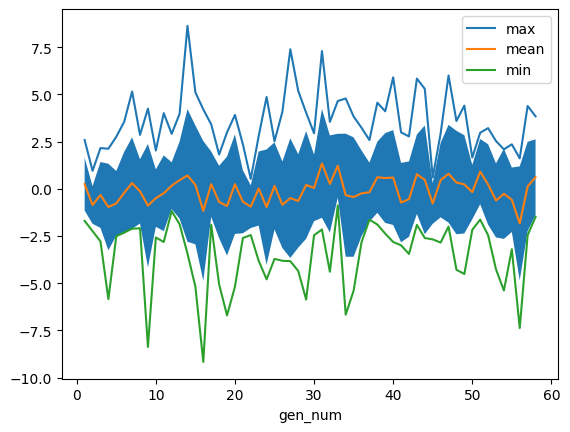

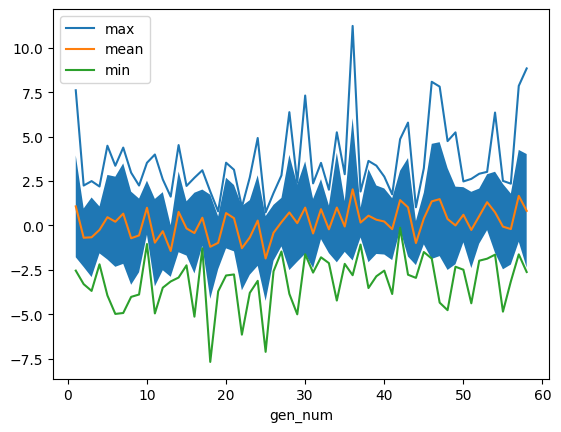

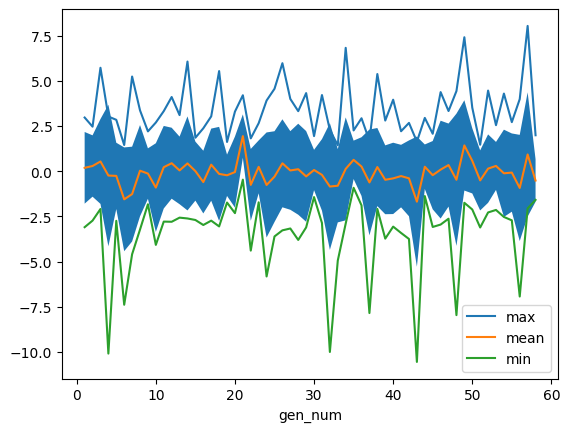

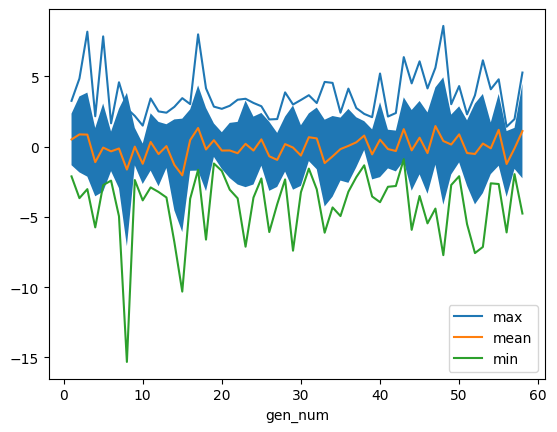

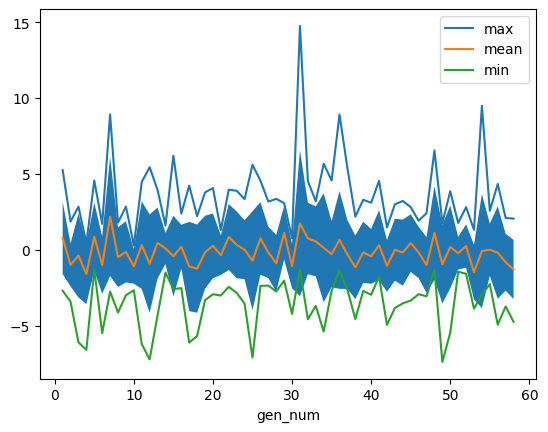

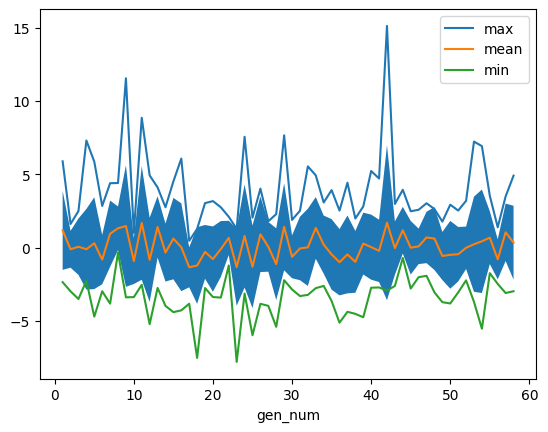

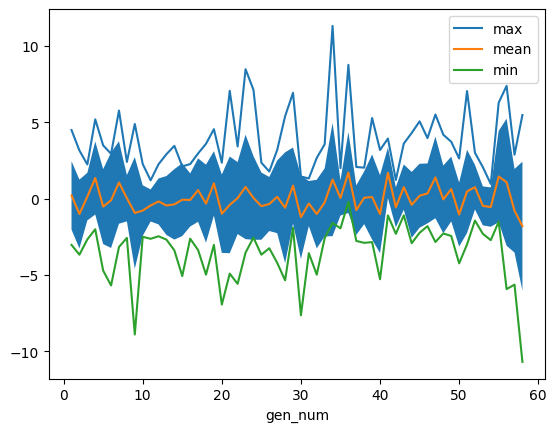

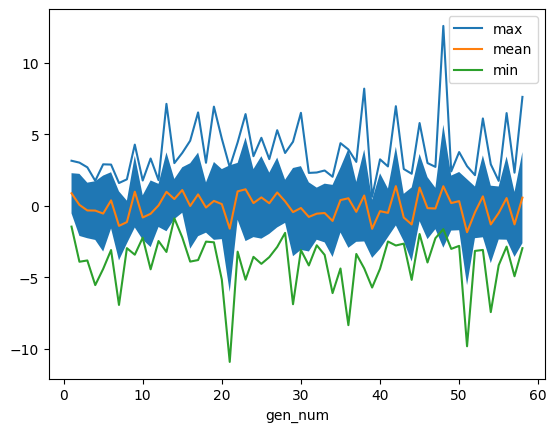

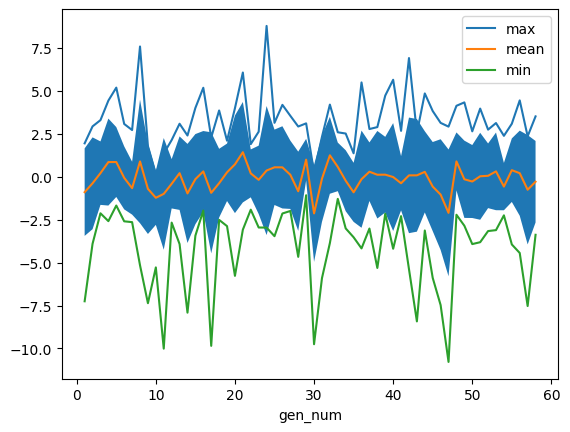

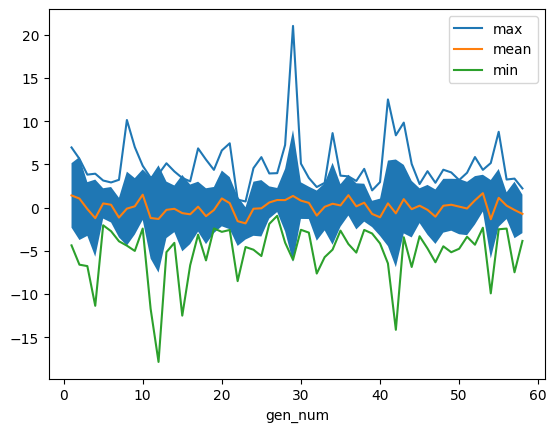

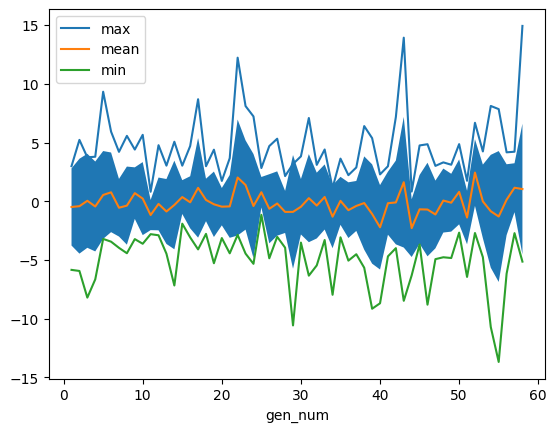

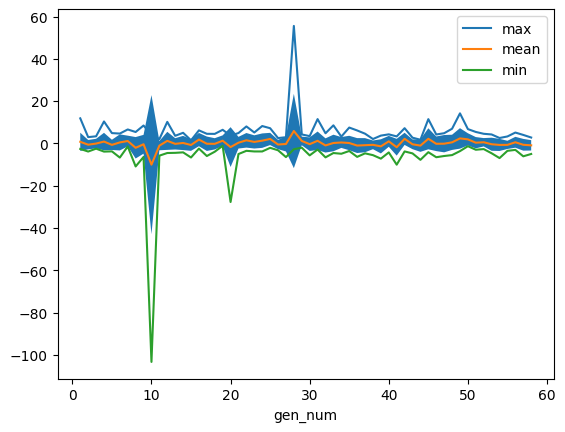

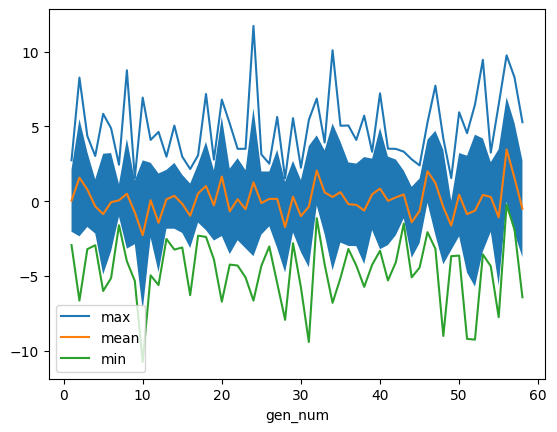

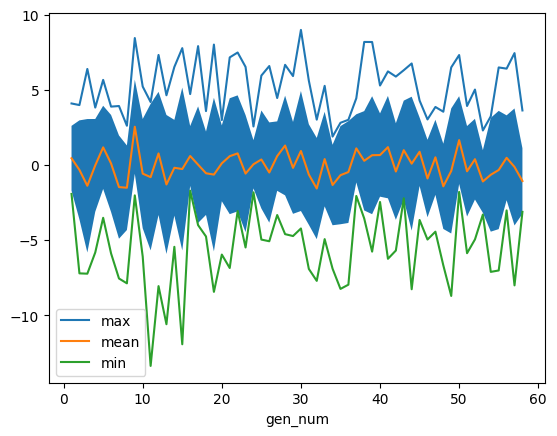

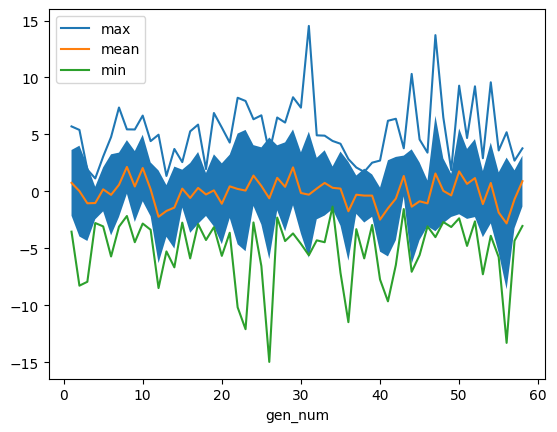

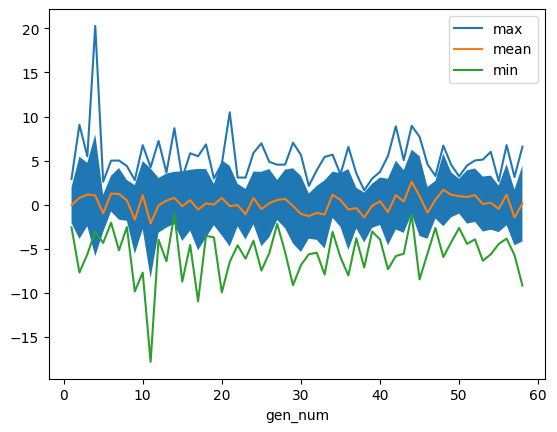

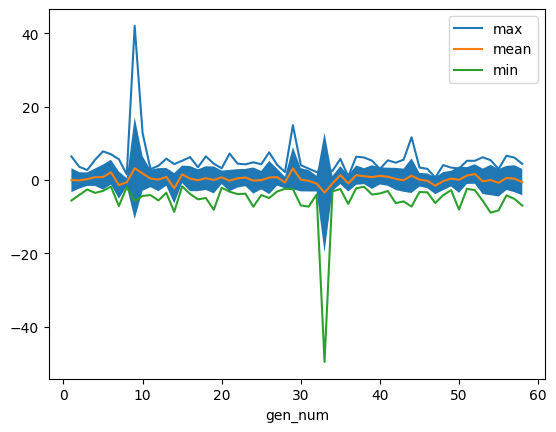

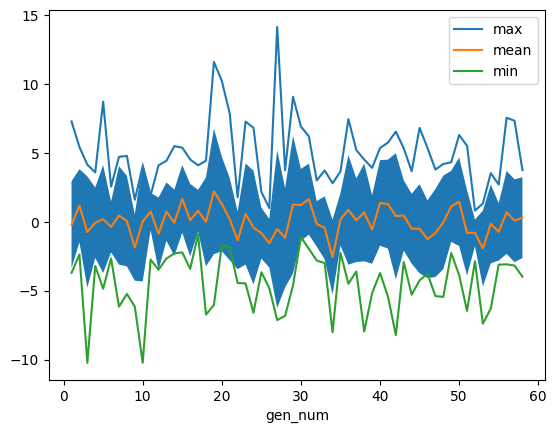

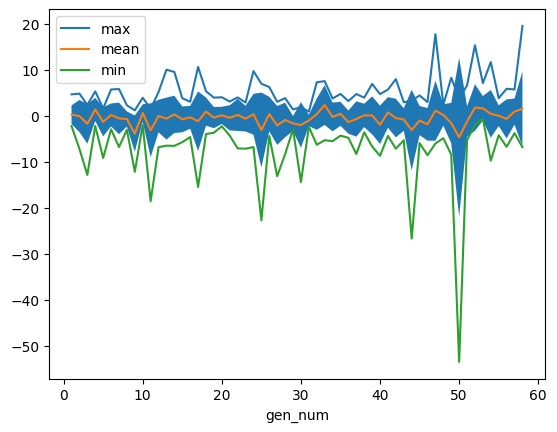

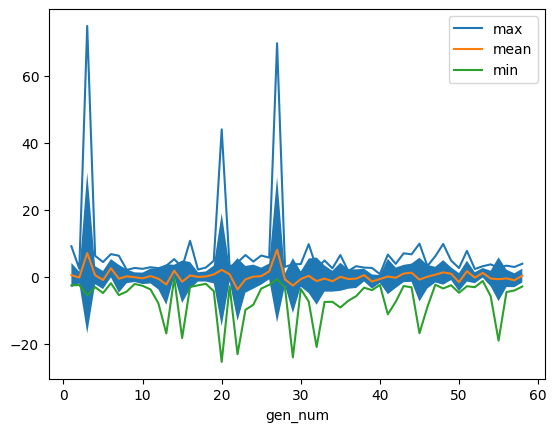

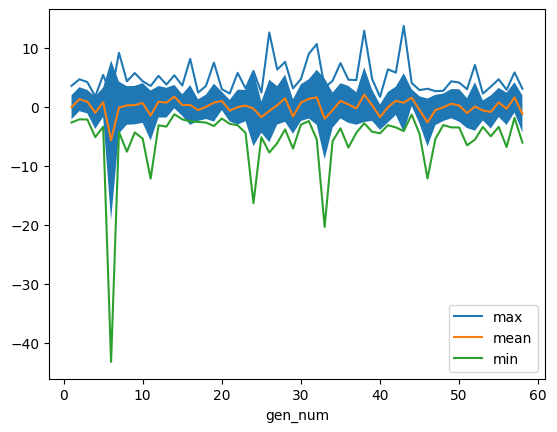

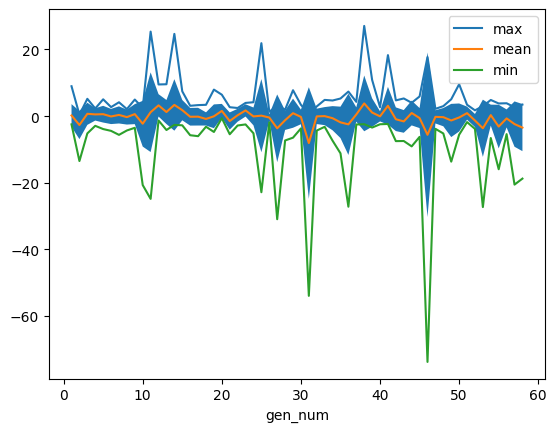

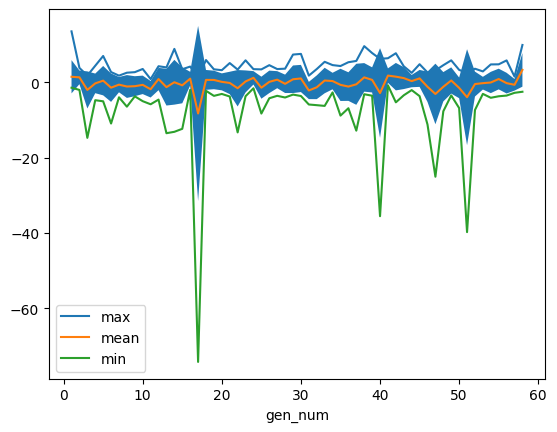

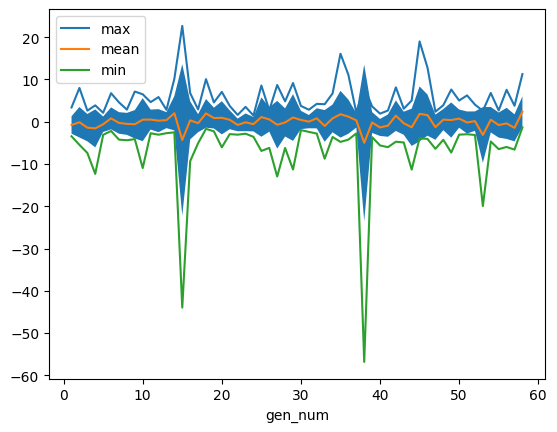

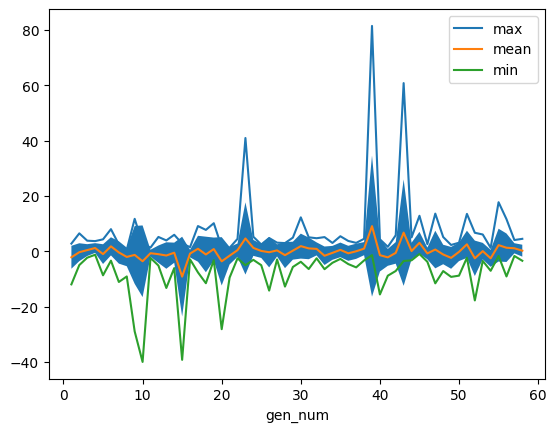

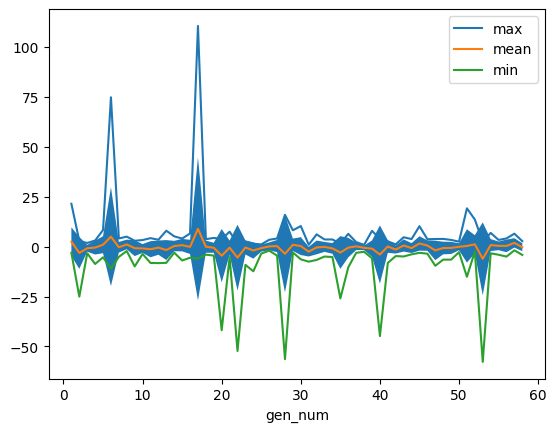

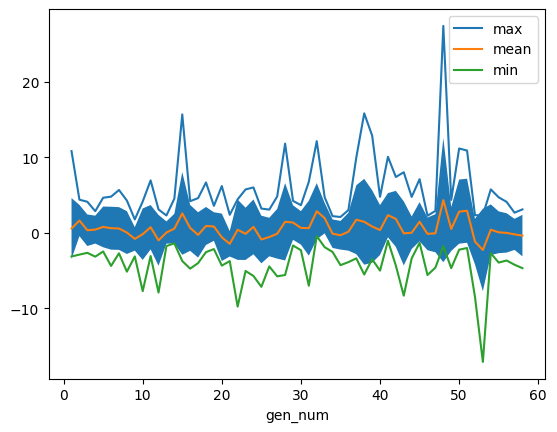

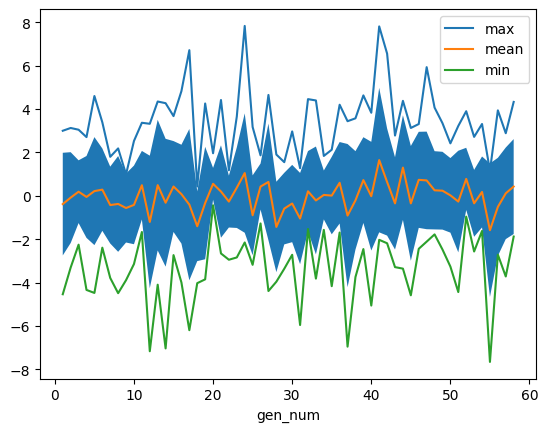

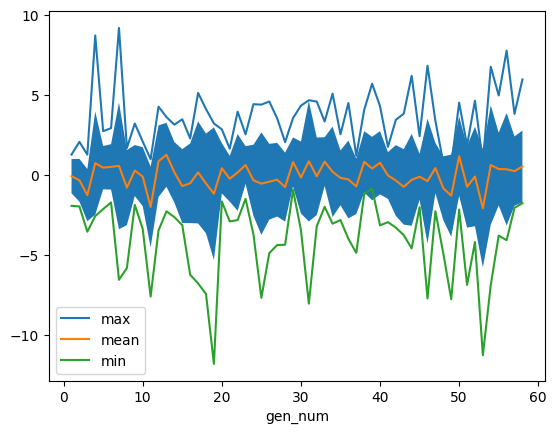

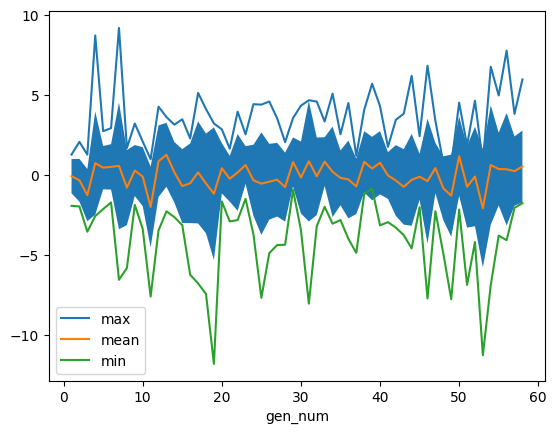

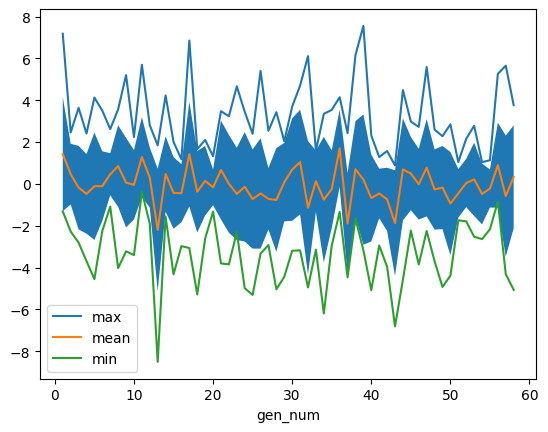

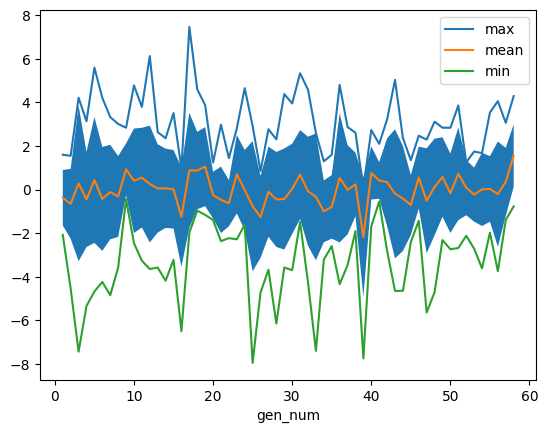

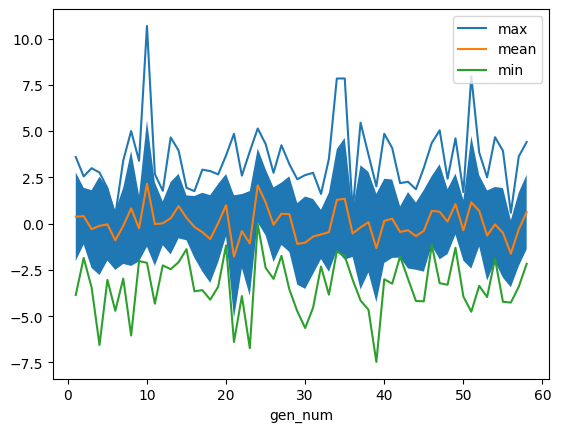

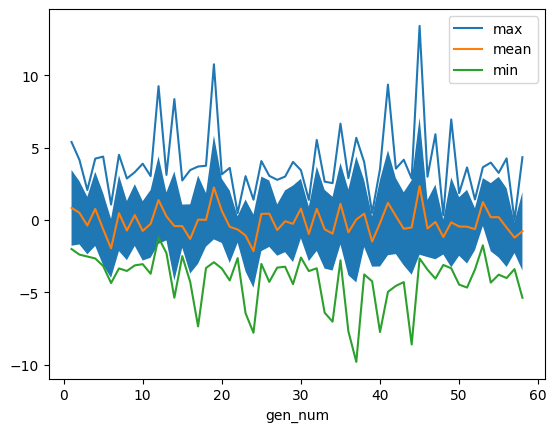

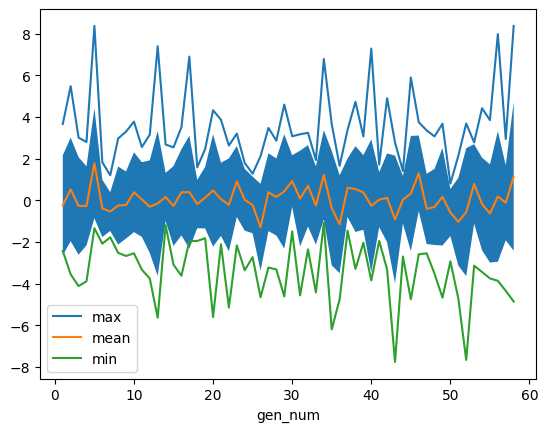

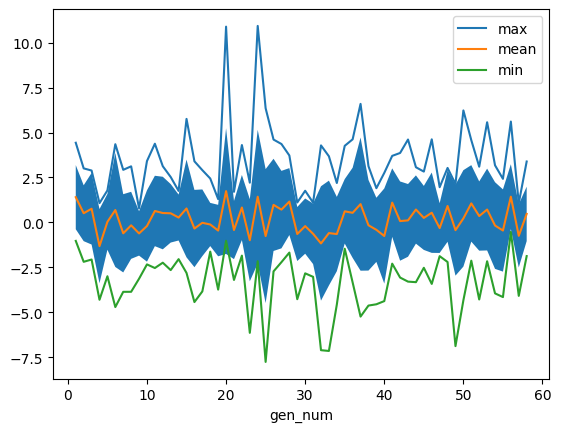

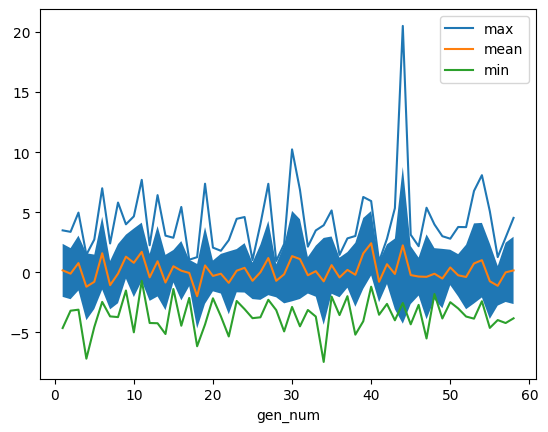

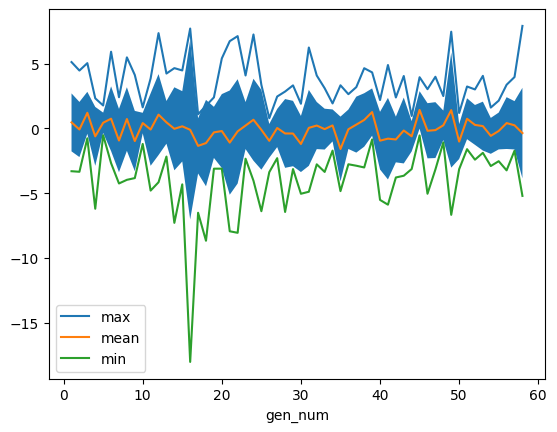

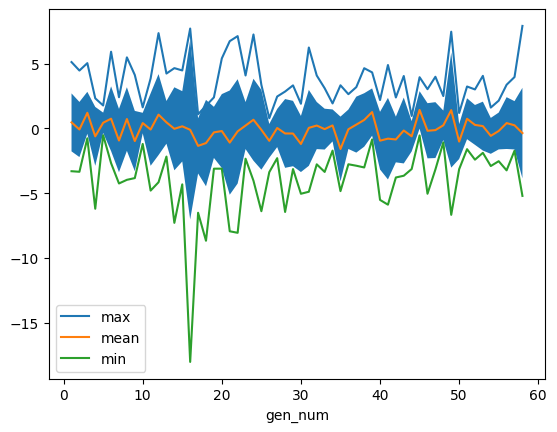

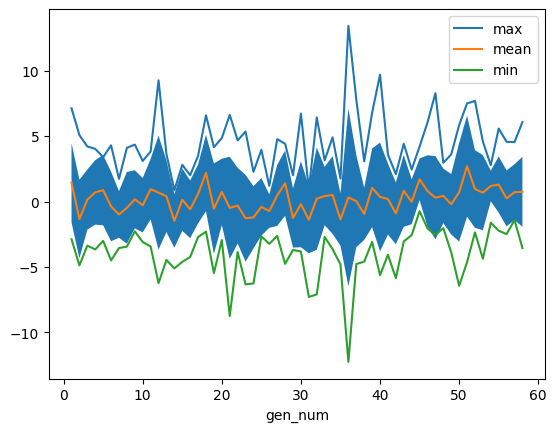

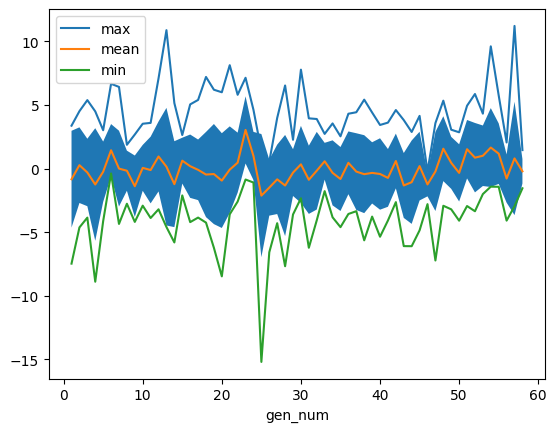

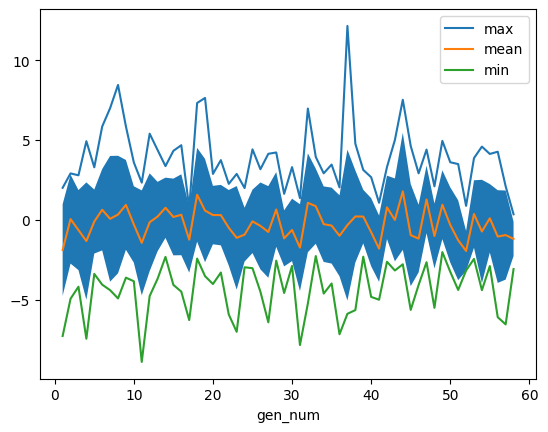

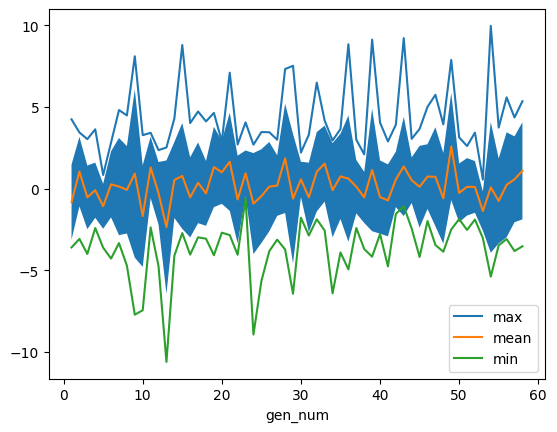

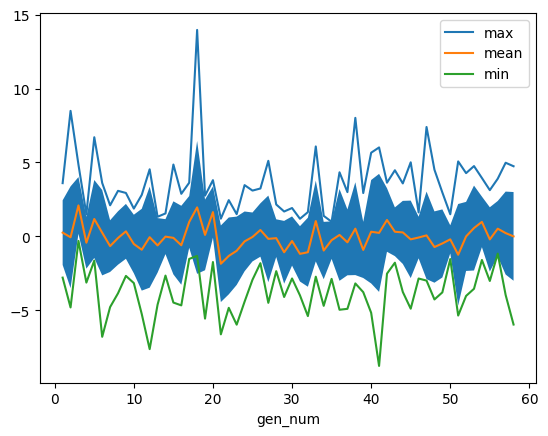

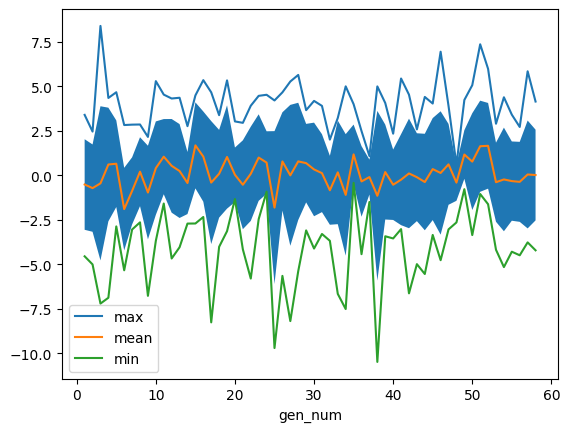

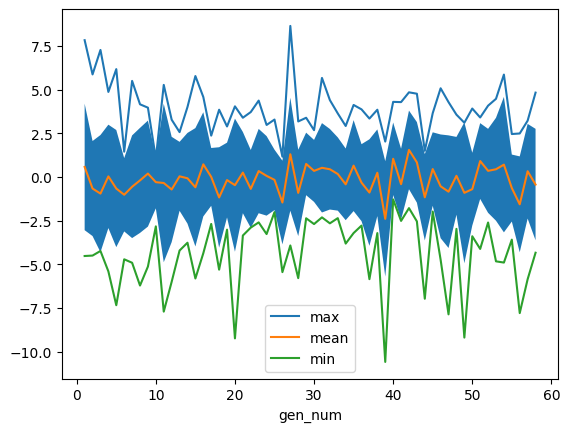

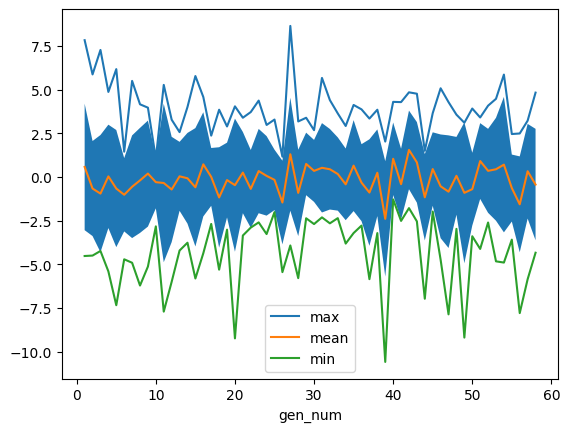

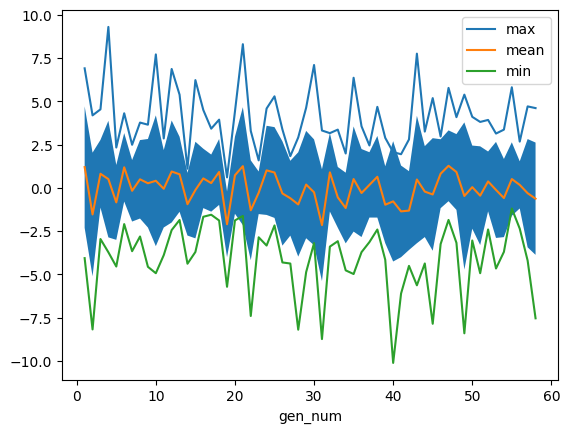

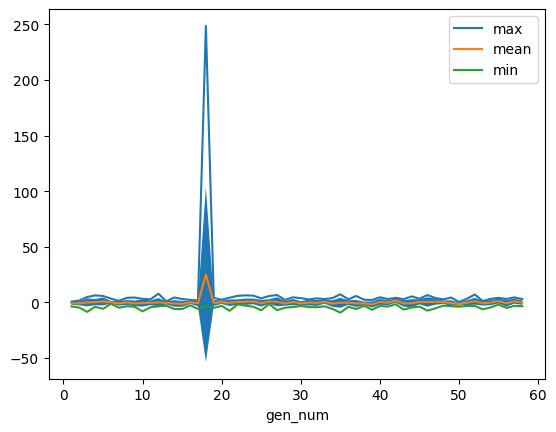

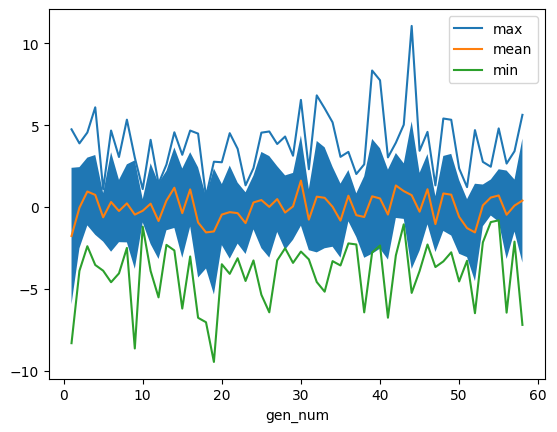

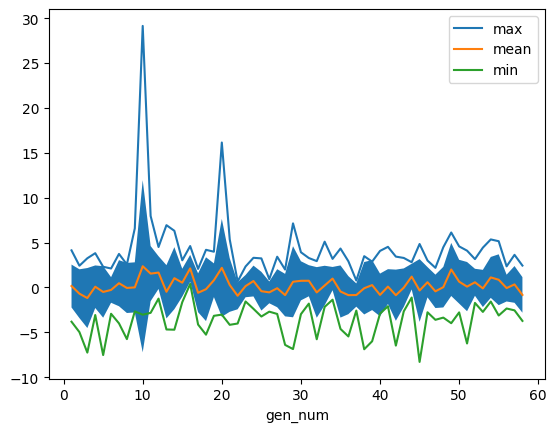

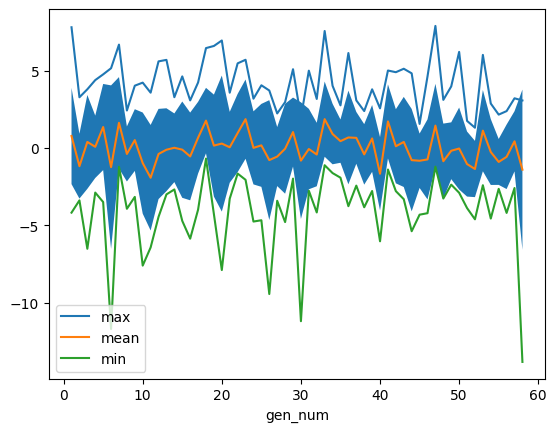

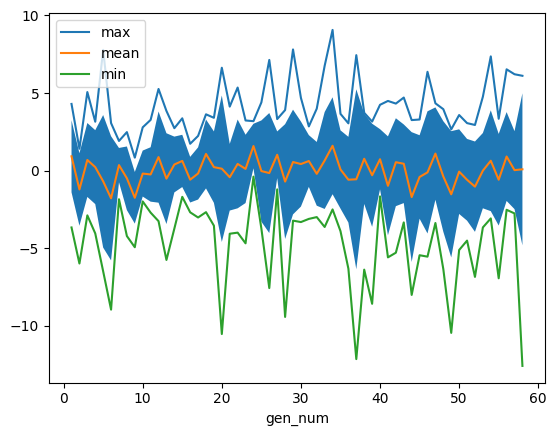

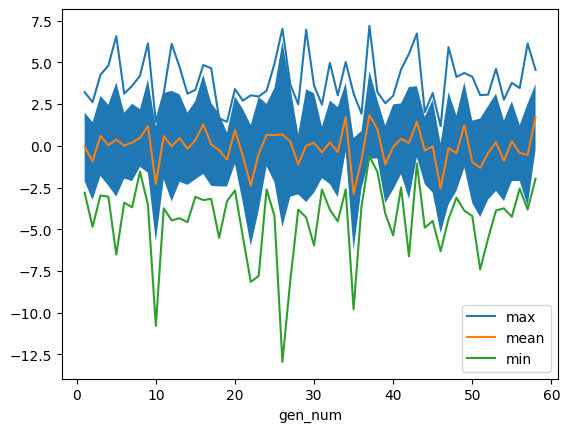

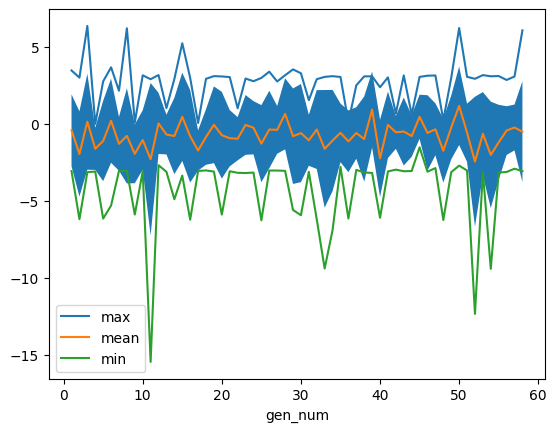

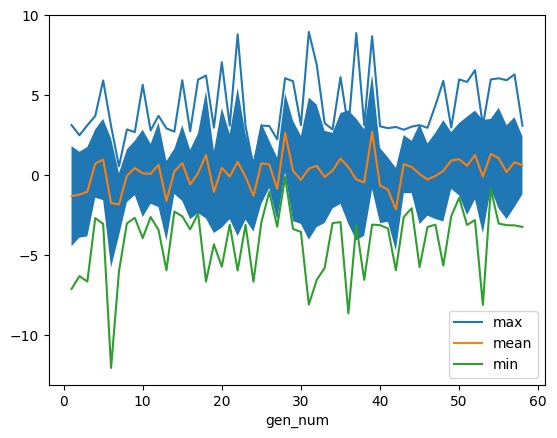

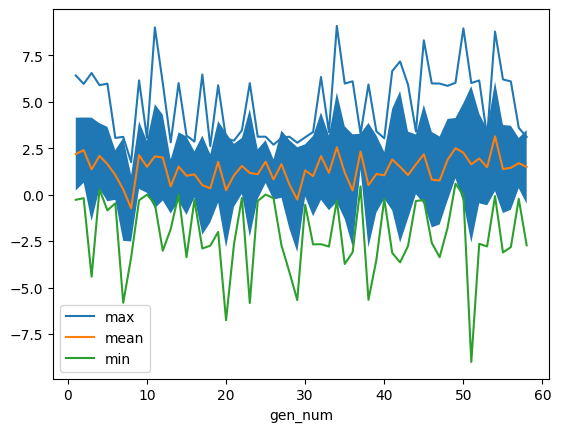

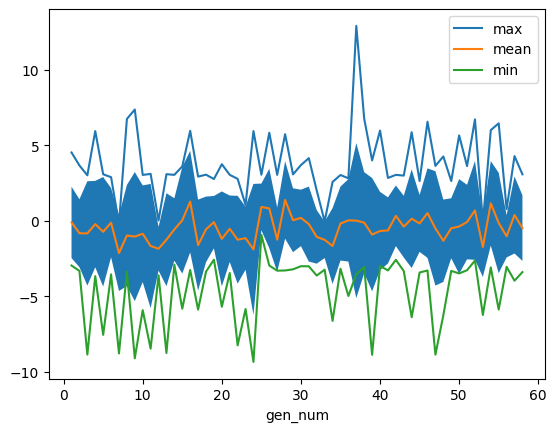

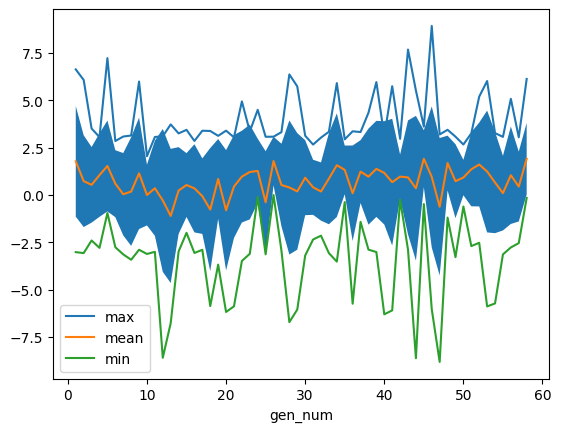

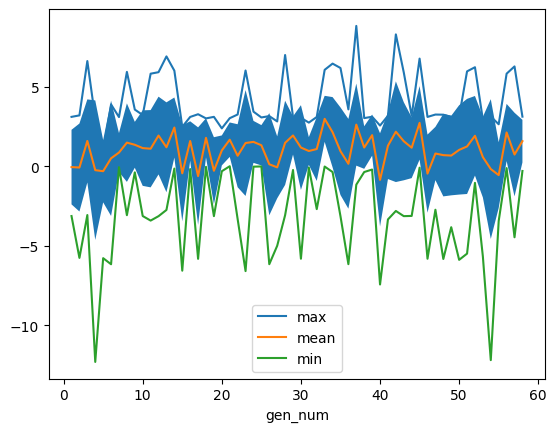

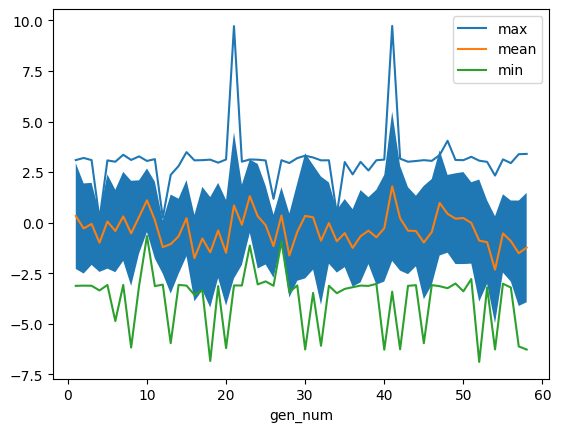

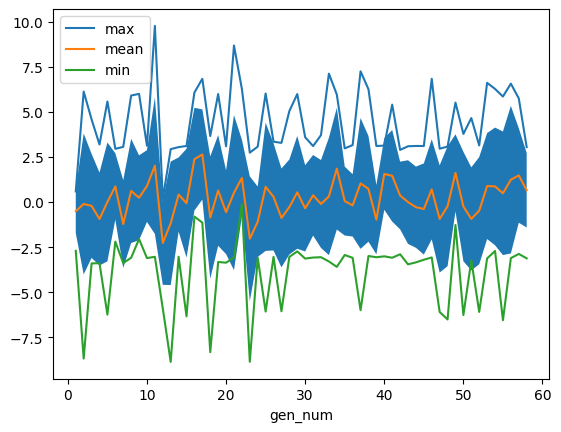

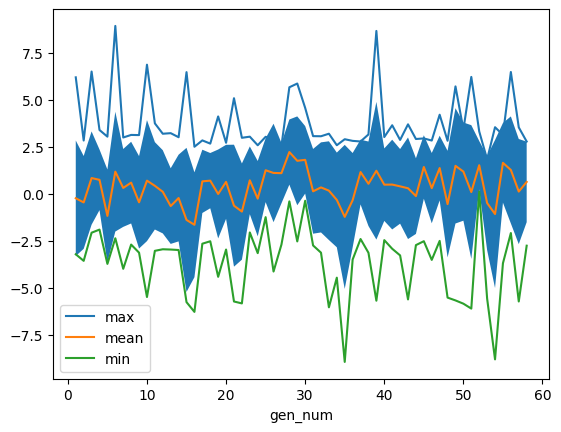

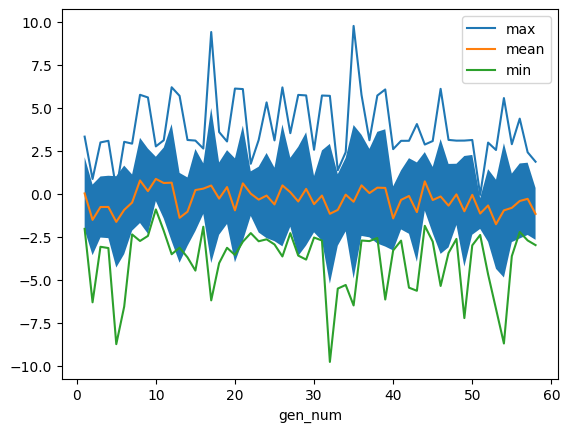

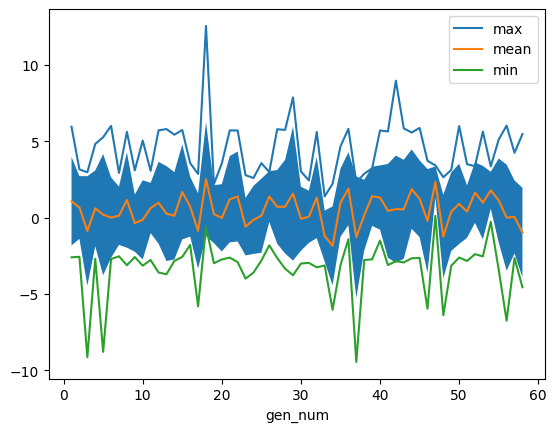

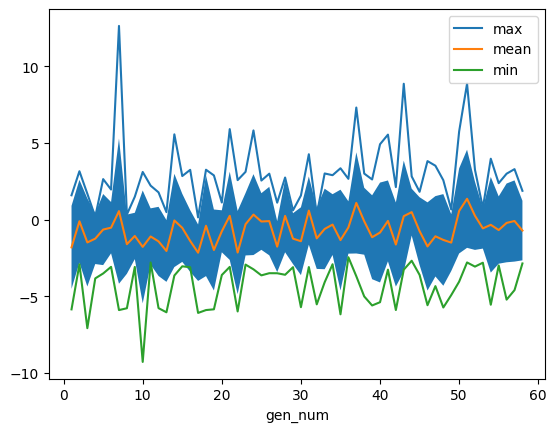

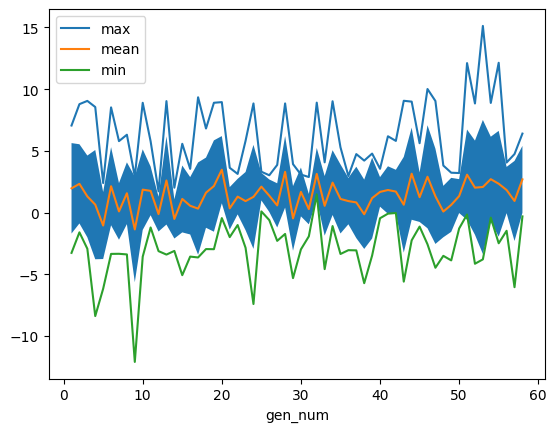

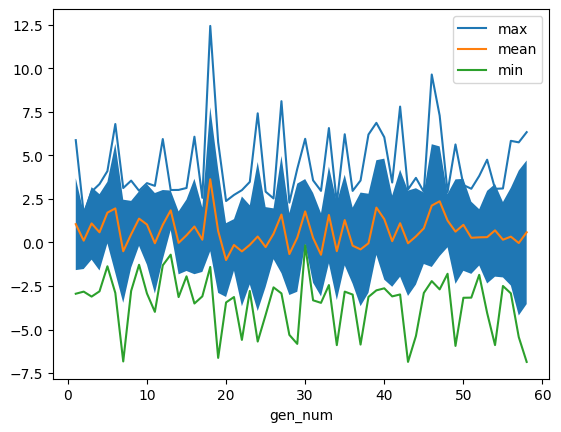

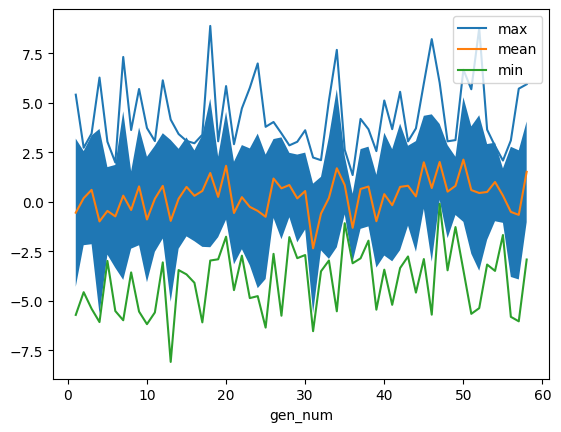

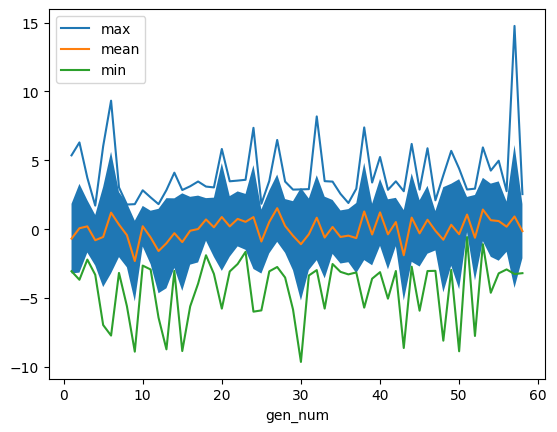

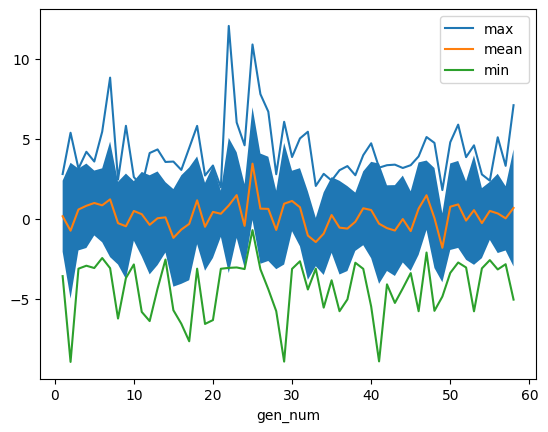

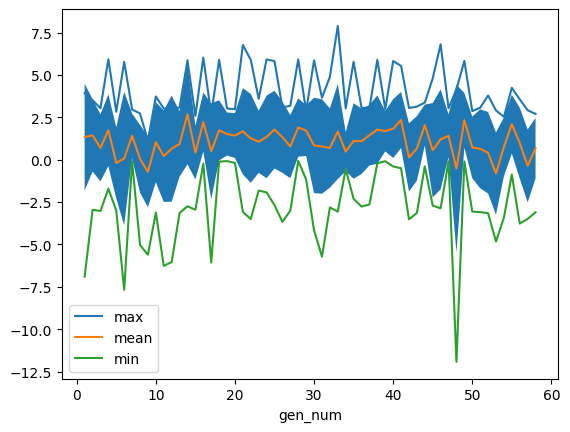

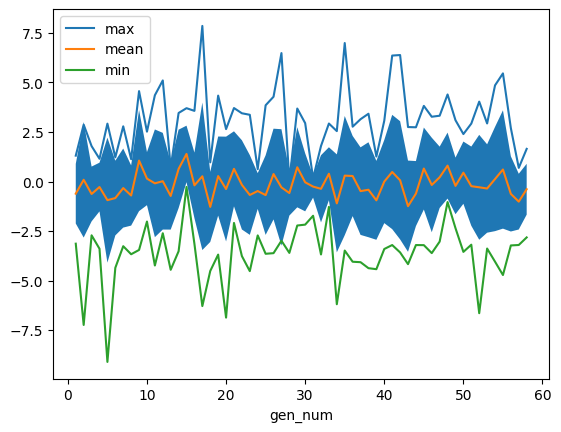

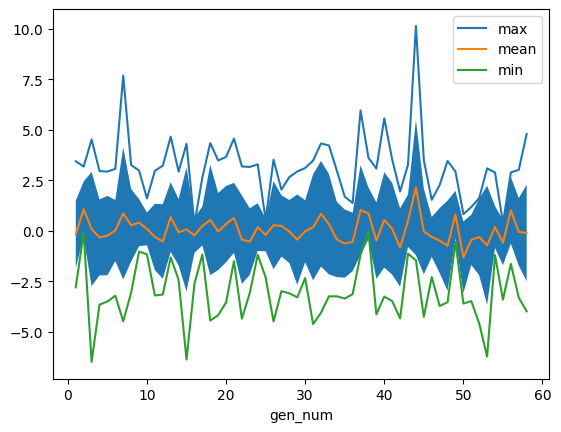

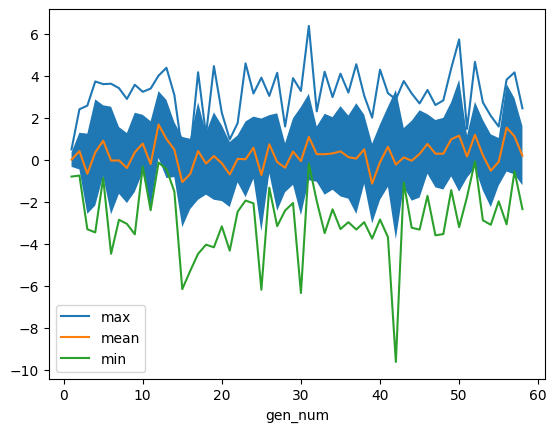

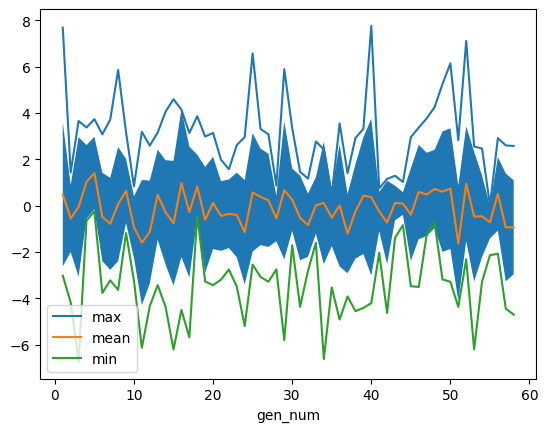

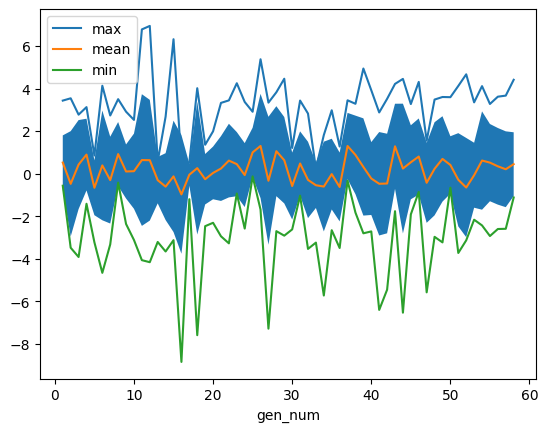

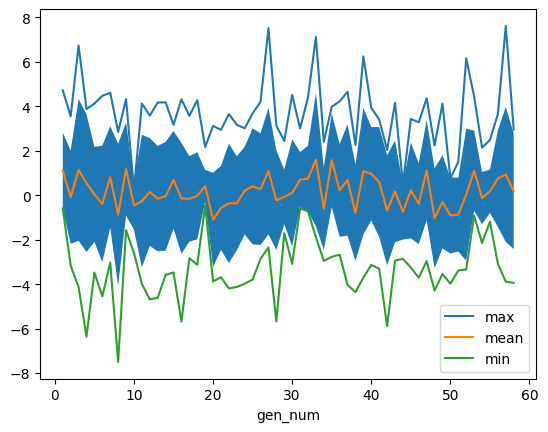

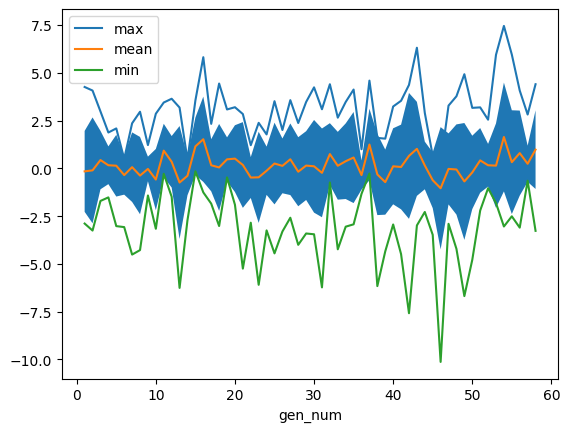

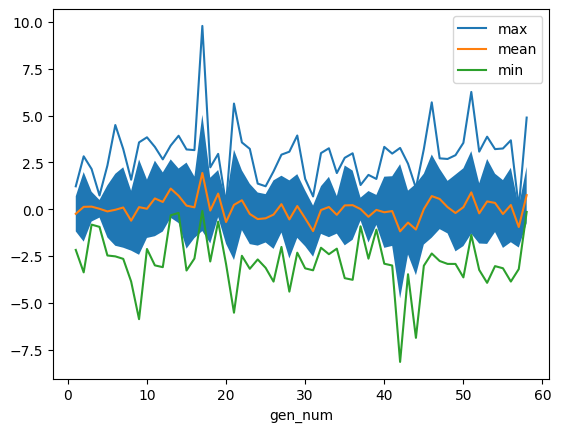

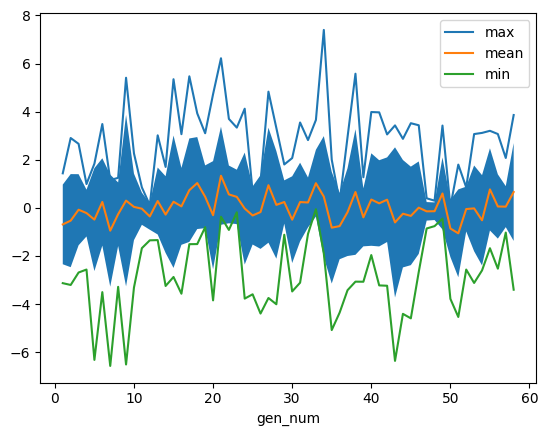

In [9]:
morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'snake6', 'snake10', 'snake14'] # 'gecko6', 'gecko10', 'gecko14', 

for morphologie in morphologies:
    for i in range(1, 10):
        database = f"data/openaiES/{morphologie}/database{i}"
        plot(database, 0)

In [3]:
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt

def append_df(df, experiment, morphologie):

    database = f"data/openaiES/{morphologie}/database{i}/data.csv"
    df_old = df
    df = pd.read_csv(database)
    df["Experiment"] = experiment
    df["Morphologie"] = morphologie
    if isinstance(df_old, pd.DataFrame):
        df = pd.concat([df, df_old])  # concat dataframes
        return df
    else: 

        return df
    
morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'snake6', 'snake10', 'snake14'] # 'gecko6', 'gecko10', 'gecko14',

df = None
for morphologie in morphologies:
    for i in range(1, 9):
        df = append_df(df, i, morphologie)


FileNotFoundError: [Errno 2] No such file or directory: 'data/openaiES/spider14/database1/data.csv'

In [17]:
df

process_id  gen_num  gen_index  individual   fitness  Experiment  \
0             0        1          0           3 -1.647165           3   
1             0        1          1           4 -0.191071           3   
2             0        1          2           5 -2.800424           3   
3             0        1          3           6 -3.138523           3   
4             0        1          4           7  1.304226           3   
..          ...      ...        ...         ...       ...         ...   
575           0       58          5         635 -0.600836           1   
576           0       58          6         636  0.336719           1   
577           0       58          7         637  8.851367           1   
578           0       58          8         638  0.617212           1   
579           0       58          9         639 -0.753074           1   

    Morphologie  
0       snake14  
1       snake14  
2       snake14  
3       snake14  
4       snake14  
..          ...  
575     spider6  
576     spider6  
577     spider6  
578     spider6  
579     spider6  

[15310 rows x 7 columns]

In [19]:
df2 = df.groupby('individual').mean()['fitness']

# Reset the index to keep the other columns
df2 = df2.reset_index()

# Print the result
print(df2)

     individual   fitness
0             3  0.711454
1             4  0.233916
2             5 -0.102460
3             6  0.323792
4             7  0.044417
..          ...       ...
575         635 -0.155909
576         636  0.176400
577         637  3.683267
578         638 -1.394090
579         639 -1.074856

[580 rows x 2 columns]


C:\Users\marti\AppData\Local\Temp\ipykernel_40324\1872221208.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('individual').mean()['fitness']


C:\Users\marti\AppData\Local\Temp\ipykernel_40324\2125999697.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=df, x="individual", y="fitness", ci="sd")


SyntaxError: 'return' outside function (2125999697.py, line 8)

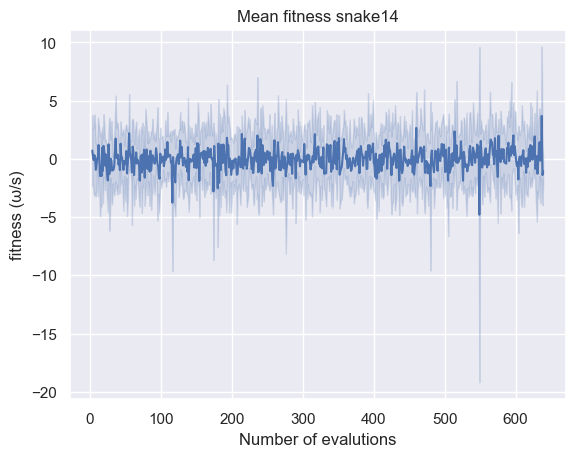

In [21]:
ax = sns.lineplot(data=df, x="individual", y="fitness", ci="sd")
ax.set(xlabel='Number of evalutions',
   ylabel='fitness (ω/s)',
   title= (f'Mean fitness {morphologie}'))
#ax.set(ylim=(0, 32))
fig = ax.get_figure()
#fig.savefig(f"mean_fitness_rotation_{morphologie}.png")
return plt.show()

In [ ]:
    
        sns.set_theme(style="darkgrid")

        # Plot the responses for different events and regions
        ax = sns.lineplot(data=df2, x="individual_id", y="fitness", ci="sd")
        ax.set(xlabel='number of evalutions',
           ylabel='Velocity (cm/s)',
           title= (f'Mean fitness {morphologie}'))
        ax.set(ylim=(0, 32))
        fig = ax.get_figure()
        #fig.savefig(f"mean_fitness_{morphologie}.png")
    return plt.show()